# 로지스틱 회귀모델의 이진분류

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 로드
data = load_breast_cancer()
X, y = data.data, data.target

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=10000)  # 최대 반복 횟수를 1만회로 설정

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9766


# 로지스틱 회귀 모델의 이진분류 : one vs rest

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Iris 데이터셋 로드 (클래스 2는 제외)
iris = load_iris()
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]  # 0 ~ 2 까지중 0, 1 만 추출하여 이진분류로 변환

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = model.score(X_test, y_test)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 1.0000


# 로지스틱 회귀 모델의 OneVsRest분류+ 멀티클래스

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=200)

# OneVsRestClassifier 상요하여 다중 클래스 분류기 생성
ovr_model = OneVsRestClassifier(model)

# 모델 학습
ovr_model.fit(X_train, y_train)

# 예측
y_pred = ovr_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.9667


# 성능 향상을 위한 표준화/GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer

# 데이터를 로드하고 전처리 (학습데이터 표준화)
X_train, y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 모델과 파라미터 그리드를 정의.
model = LogisticRegression(solver="liblinear")
param_grid = {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}

# 그리드 서치를 수행.
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 최적 마라미터와 최고 정확도를 출력.
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# 테스트 데이터에 대해 모델을 평가.
X_test, y_test = load_breast_cancer(return_X_y=True)
X_test_scaled = scaler.transform(X_test)
test_accuracy = grid_search.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

model = LogisticRegression(C=0.1, penalty="l2")
model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9802197802197803
Test Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# 위코드의 최적화
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 불러오기
X, y = load_breast_cancer(return_X_y=True)

# 2. 학습/테스트 데이터 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. 스케일링 (train에 fit, test에 transform만)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 모델과 파라미터 그리드 설정
model = LogisticRegression(solver="liblinear")
param_grid = {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}

# 5. 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 6. 최적 하이퍼파라미터 및 정확도 출력
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 7. 테스트 데이터로 모델 평가
test_accuracy = grid_search.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

# 8. 최적 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# 9. 성능 평가 지표 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9802197802197803
Test Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [31]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Confusion Matrix:
[[41  1]
 [ 1 71]]


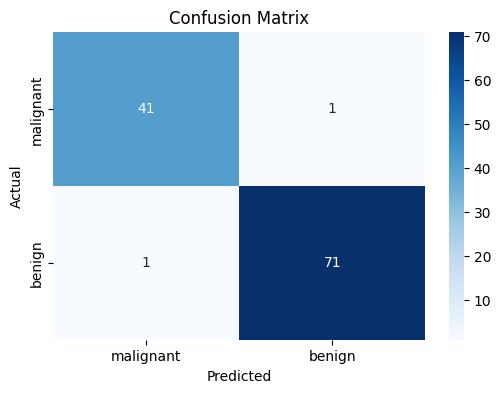


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=data.target_names,
    yticklabels=data.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 분류 리포트 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))